<a href="https://colab.research.google.com/github/nmuonko/My-Projects/blob/main/Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# load numpy 
import numpy as np

# load pandas
import pandas as pd

# configure pandas display settings
pd.options.display.max_columns = None
pd.options.display.max_rows = None


In [5]:
data = pd.read_csv('/content/creditcard.csv')

In [6]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [7]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162557 entries, 0 to 162556
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    162557 non-null  float64
 1   V1      162557 non-null  float64
 2   V2      162557 non-null  float64
 3   V3      162557 non-null  float64
 4   V4      162557 non-null  float64
 5   V5      162557 non-null  float64
 6   V6      162557 non-null  float64
 7   V7      162557 non-null  float64
 8   V8      162557 non-null  float64
 9   V9      162557 non-null  float64
 10  V10     162557 non-null  float64
 11  V11     162557 non-null  float64
 12  V12     162557 non-null  float64
 13  V13     162557 non-null  float64
 14  V14     162557 non-null  float64
 15  V15     162557 non-null  float64
 16  V16     162557 non-null  float64
 17  V17     162557 non-null  float64
 18  V18     162557 non-null  float64
 19  V19     162557 non-null  float64
 20  V20     162557 non-null  float64
 21  V21     16

In [9]:
data.shape

(162557, 31)

In [10]:
numerical_features = [col for col in data.columns if data[col].dtype == 'float64'] 
numerical_features

['Time',
 'V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'Amount',
 'Class']

In [11]:
numerical_features_datset = data[numerical_features]

In [12]:
numerical_features_datset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [13]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       1
Amount    1
Class     1
dtype: int64

In [14]:
for col in numerical_features:
    data[col] = data[col].fillna(data[col].median())

In [15]:
numerical_features

['Time',
 'V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'Amount',
 'Class']

In [16]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [17]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [18]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()

min_max_scaler.fit(data)

MinMaxScaler()

In [19]:
trans = min_max_scaler.transform(data)

dataset_scaled = pd.DataFrame(trans)

dataset_scaled.columns = data.columns
dataset_scaled.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,162557.000000,162557.000000,162557.000000,162557.000000,162557.000000,162557.000000,162557.000000,162557.000000,162557.000000,162557.000000,162557.000000,162557.000000,162557.000000,162557.000000,162557.000000,162557.000000,162557.000000,162557.000000,162557.000000,162557.000000,162557.000000,162557.000000,162557.000000,162557.000000,162557.000000,162557.000000,162557.000000,162557.000000,162557.000000,162557.000000,162557.000000
mean,0.504916,0.955180,0.767804,0.794916,0.252496,0.545128,0.538609,0.541729,0.785820,0.463509,0.507933,0.265396,0.700176,0.566165,0.649316,0.452149,0.697944,0.732535,0.649619,0.577935,0.367368,0.560927,0.505553,0.701800,0.415038,0.583724,0.427758,0.650034,0.257106,0.004425,0.002190
std,0.219409,0.031350,0.017012,0.031616,0.060885,0.017339,0.026534,0.015055,0.013248,0.039919,0.022687,0.065283,0.043751,0.101973,0.032967,0.092775,0.043620,0.026755,0.057386,0.065228,0.011606,0.012002,0.030699,0.009153,0.087067,0.025658,0.080406,0.011292,0.006786,0.012432,0.046746
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.350036,0.941536,0.761692,0.782545,0.214247,0.536740,0.523261,0.535519,0.783724,0.439997,0.497945,0.218258,0.684521,0.498754,0.635152,0.395706,0.675178,0.719239,0.617306,0.539389,0.363921,0.557746,0.484414,0.699519,0.365522,0.567921,0.371416,0.648116,0.256635,0.000273,0.000000
50%,0.510915,0.954794,0.768514,0.797566,0.252835,0.544537,0.533268,0.542382,0.786057,0.459969,0.506336,0.260483,0.708372,0.562757,0.649448,0.463445,0.701559,0.730776,0.649601,0.577604,0.366275,0.560544,0.506469,0.701587,0.422516,0.586136,0.415636,0.650247,0.257532,0.001084,0.000000
75%,0.662845,0.978530,0.775816,0.812777,0.289220,0.552161,0.546590,0.548474,0.789225,0.485159,0.516921,0.315862,0.727606,0.632126,0.664078,0.519911,0.724495,0.743931,0.682640,0.617245,0.369353,0.563418,0.526079,0.703664,0.473867,0.600650,0.470720,0.652551,0.258766,0.003873,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [20]:

# Let's see the performance with original dataset

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
x = data.drop(['Class'], axis = 1)
y = data['Class']

x_train,x_test,y_train,y_test = train_test_split(x,y , test_size= 0.3,random_state = 1)

model = LogisticRegression()

model.fit(x_train, y_train)

y_pred = model.predict(x_test)
print(confusion_matrix(y_test, y_pred))

[[48636    27]
 [   44    61]]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [21]:
dataset_scaled['Class'].value_counts()

0.0    162201
1.0       356
Name: Class, dtype: int64

In [22]:
pip install imblearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [23]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [24]:
X_smote , y_smote = smote.fit_resample(x,  y)

In [25]:
X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(X_smote, y_smote, test_size=0.25)

In [26]:
print("Before smote", (y_train))
print("After smote", (y_train_sm))

Streaming output truncated to the last 5000 lines.
19021     0.0
121290    0.0
113470    0.0
39129     0.0
149263    0.0
25549     0.0
140638    0.0
147511    0.0
131406    0.0
114186    0.0
46903     0.0
8031      0.0
128991    0.0
55583     0.0
151190    0.0
2691      0.0
135120    0.0
108424    0.0
6380      0.0
36591     0.0
94894     0.0
95668     0.0
17443     0.0
136120    0.0
159843    0.0
33768     0.0
119757    0.0
14450     0.0
67094     0.0
152231    0.0
111739    0.0
112139    0.0
137151    0.0
18924     0.0
83685     0.0
40026     0.0
41596     0.0
67767     0.0
159245    0.0
29315     0.0
80800     0.0
110664    0.0
93742     0.0
119022    0.0
50352     0.0
79071     0.0
74924     0.0
133369    0.0
114900    0.0
42521     0.0
54608     0.0
756       0.0
82759     0.0
68869     0.0
103411    0.0
94268     0.0
150802    0.0
133755    0.0
121505    0.0
140287    0.0
27110     0.0
156660    0.0
33408     0.0
17729     0.0
156985    0.0
11857     0.0
82933     0.0
88656     0

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [27]:
LogR = LogisticRegression()
LogR.fit(X_train_sm, y_train_sm)
pred_y_smote = LogR.predict(X_test_sm)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [28]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
accuracy_score(y_test_sm, pred_y_smote)

0.9732802308232944

In [29]:
classification_report(y_test_sm, pred_y_smote)

'              precision    recall  f1-score   support\n\n         0.0       0.96      0.98      0.97     40609\n         1.0       0.98      0.96      0.97     40492\n\n    accuracy                           0.97     81101\n   macro avg       0.97      0.97      0.97     81101\nweighted avg       0.97      0.97      0.97     81101\n'

In [30]:
confusion_matrix(y_test_sm, pred_y_smote)

array([[39921,   688],
       [ 1479, 39013]])

In [31]:
from sklearn.decomposition import PCA

pca = PCA()

pca.fit(dataset_scaled)


PCA()

In [32]:
print(pca.components_)

[[-9.98286641e-01 -7.56760970e-03 -2.50227804e-03  2.42539419e-02
   8.12704815e-03 -6.62588730e-03  3.69315963e-03 -2.19364083e-03
   1.19028072e-03 -5.65239361e-03 -1.22874525e-04  3.02813969e-02
  -4.53658458e-03 -1.13787997e-02 -1.87858934e-03  2.48150658e-02
   9.63350298e-04  5.56143626e-03 -1.94191117e-02 -6.91089909e-04
   1.23209908e-03 -2.04030744e-04 -7.62736841e-03 -1.14599858e-03
   7.48302016e-04  1.13009880e-02  1.78884959e-02  3.82652462e-05
   3.06561342e-05  1.79862689e-03  1.37199571e-03]
 [-1.82977822e-02  3.84628795e-03  3.59584486e-03 -1.80751080e-02
   1.79561496e-02  9.79972378e-03  3.14879383e-03  1.96881396e-03
  -1.21677086e-03  5.12119582e-02 -8.58975447e-03  3.92686307e-02
  -9.27718986e-02  9.34333714e-01  3.63841189e-02 -3.22621509e-01
  -3.46410958e-04  1.32782969e-02  3.31176485e-02  8.62930465e-03
   4.56819622e-04  9.20150784e-05 -4.65592489e-04 -3.75357837e-04
  -7.87417382e-02 -1.19553983e-03  7.96794482e-03 -3.46633577e-04
  -1.01575322e-04  4.9000

In [33]:
print(pca.components_.shape)

(31, 31)


In [34]:
print(type(pca.components_))

<class 'numpy.ndarray'>


In [35]:
print(pca.explained_variance_)

[4.82923999e-02 1.07740589e-02 8.48074760e-03 7.57586134e-03
 6.47188615e-03 4.65969876e-03 4.31418736e-03 3.85448156e-03
 3.32527440e-03 2.61981735e-03 1.90242728e-03 1.75785298e-03
 1.27620499e-03 1.07479976e-03 1.01957843e-03 8.28789673e-04
 7.64090414e-04 6.50862677e-04 5.55345325e-04 4.36862789e-04
 4.27698289e-04 3.51619685e-04 2.74675118e-04 2.03240319e-04
 1.73631336e-04 1.41208237e-04 1.30133292e-04 1.22334822e-04
 8.19908578e-05 4.38204444e-05 6.15476996e-06]


In [36]:
print(len(pca.explained_variance_))

31


In [37]:
print(pca.mean_)

[0.50491607 0.95517999 0.7678041  0.79491581 0.25249604 0.54512804
 0.5386094  0.54172892 0.78582007 0.4635093  0.50793316 0.26539586
 0.70017613 0.56616528 0.64931559 0.45214851 0.69794405 0.73253524
 0.6496193  0.57793523 0.36736813 0.5609274  0.50555342 0.70180026
 0.41503828 0.58372407 0.42775779 0.65003432 0.25710628 0.00442521
 0.00219   ]


In [38]:

print(pca.noise_variance_)

0.0


In [39]:
principal_components = pca.fit_transform(dataset_scaled)

print(type(principal_components))
print(principal_components.shape)

principal_components_df = pd.DataFrame(principal_components)

<class 'numpy.ndarray'>
(162557, 31)


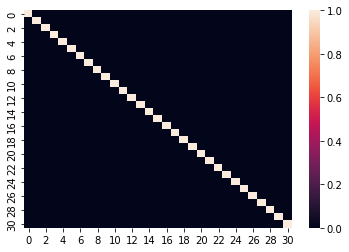

In [40]:
import seaborn as sns

sns.heatmap(principal_components_df.corr())

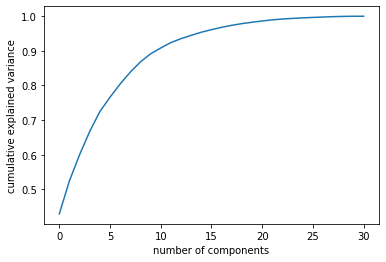

In [41]:
import matplotlib.pyplot as plt

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [42]:
pca_low_dim = PCA(n_components = 3)
pca_low_dim.fit(dataset_scaled)

PCA(n_components=3)

In [43]:
print(pca_low_dim.explained_variance_)

[0.0482924  0.01077406 0.00848075]


In [45]:
print(pca_low_dim.explained_variance_.sum())

0.06754720641812666
